<a href="https://colab.research.google.com/github/Pepper-2020/ASSIGN1/blob/main/ASSIGN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
X = pd.read_csv('CC GENERAL.csv')
 
X = X.drop('CUST_ID', axis = 1)

X.fillna(method ='ffill', inplace = True)

In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

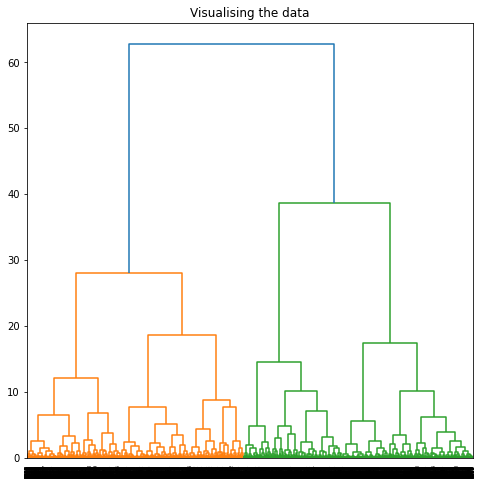

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

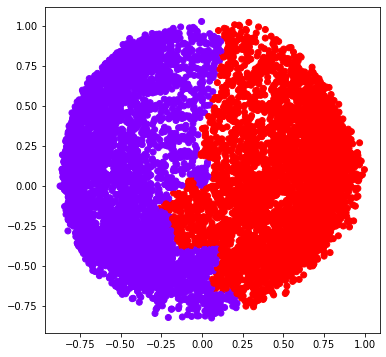

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

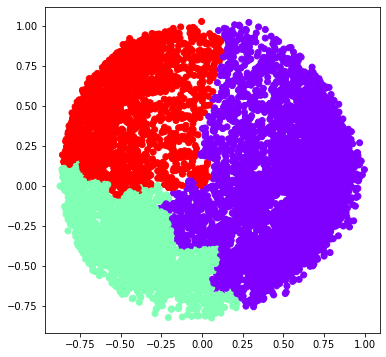

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

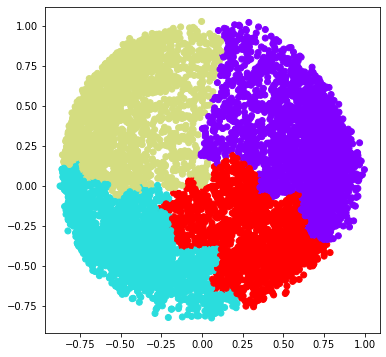

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

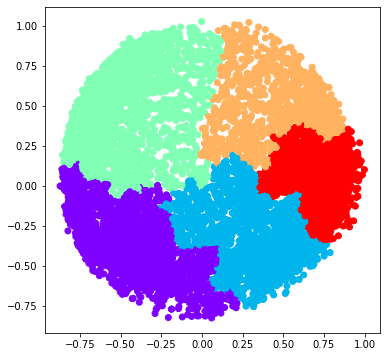

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 5)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

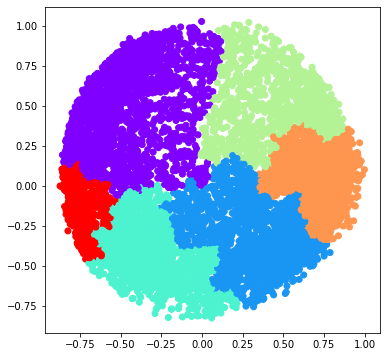

In [ ]:
ac6 = AgglomerativeClustering(n_clusters = 6)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

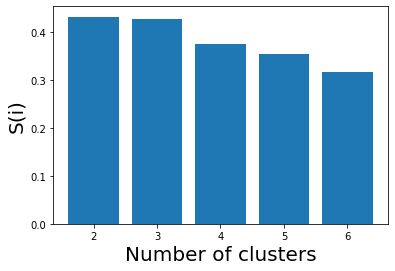

In [ ]:
k = [2, 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

text model

In [15]:

import pandas as pt
import os

In [18]:
papers  = pd.read_csv('papers.csv')

In [19]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [20]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
5234,2015,LASSO with Non-linear Measurements is Equivale...,"Consider estimating an unknown, but structured...",LASSO with Non-linear Measurements is Equivale...
4138,2012,A Scalable CUR Matrix Decomposition Algorithm:...,The CUR matrix decomposition is an important e...,A Scalable CUR Matrix Decomposition Algorithm:...
6510,1994,Hyperparameters Evidence and Generalisation fo...,Abstract Missing,"Hyperparameters, Evidence and\nGeneralisation ..."
6084,2016,A Locally Adaptive Normal Distribution,The multivariate normal density is a monotonic...,A Locally Adaptive Normal Distribution\n\nGeor...
1264,2002,Discriminative Binaural Sound Localization,Abstract Missing,Discriminative Binaural Sound Localization\nEh...


In [21]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [22]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

5234    lasso with non-linear measurements is equivale...
4138    a scalable cur matrix decomposition algorithm:...
6510    hyperparameters evidence and\ngeneralisation f...
6084    a locally adaptive normal distribution\n\ngeor...
1264    discriminative binaural sound localization\neh...
Name: paper_text_processed, dtype: object

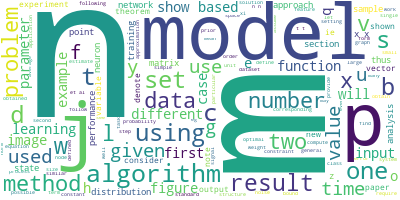

In [23]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()